In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cv2show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)

In [3]:
# 对图片进行垂直分割，传入的是二值图
def verticalCut(img):
    (x,y)=img.shape #返回的分别是矩阵的行数和列数，x是行数，y是列数
    print((x,y))
    pointCount=np.zeros(y,dtype=np.float32)#每列黑色的个数
    x_axes=np.arange(0,y)
    #i是列数，j是行数
    tempimg=img.copy()
    for i in range(0,y):
        for j in range(0,x):
            # if j<15:
            if(tempimg[j,i] == 0):
                pointCount[i]=pointCount[i]+1
    #figure=plt.figure(str(img_num))
    plt.plot(x_axes,pointCount)
    start = []
    end = []
    # 对照片进行分割
    print(pointCount)
    for index in range(1, y-1):
        # 上个为0当前不为0，即为开始
        if ((pointCount[index-1] == x) & (pointCount[index] < x)):
            start.append(index)
        # 上个不为0当前为0，即为结束
        elif ((pointCount[index] < x) & (pointCount[index +1] == x)):
            end.append(index)
    print('start:',start)
    print('end:',end)
    imgArr=[]
    for idx in range(0,len(start)):
        tmp = img[:,start[idx]:end[idx]]
        cv2show('a',tmp)
    
    '''
    for idx in range(0,len(start)):
        tmp = img[:;start[idx]:end[idx]]
        cv2show('aa',tmp)
        tempimg=img[ :,start[idx]:end[idx]]
        cv2.imshow(str(img_num)+"_"+str(idx), tempimg)
        cv2.imwrite(img_num+'_'+str(idx)+'.jpg',tempimg)
        imgArr.append(tempimg)
    '''
    return imgArr

In [4]:
img_path = './aaa.png'
img = cv2.imread(img_path)
img_blur = cv2.GaussianBlur(img,(5,5),0,0,cv2.BORDER_DEFAULT)
img_gray = cv2.cvtColor(img_blur,cv2.COLOR_BGR2GRAY)
ret, img_thresh = cv2.threshold(img_gray, 0, 255, + cv2.THRESH_OTSU)
img_medi = cv2.medianBlur(img_thresh, 3)

In [5]:
cv2show('org',img)
cv2show('blur',img_blur)
cv2show('gray',img_gray)
cv2show('thresh',img_thresh)
cv2show('medi',img_medi)

(38, 155)
[38. 38. 38. 38. 36. 27. 24. 23. 26. 21.  8.  8. 11. 11. 11. 10.  9. 11.
 14. 16. 38. 38. 38. 38. 38. 16. 12. 10.  8. 27. 28. 28. 26. 24. 23. 22.
 21. 13. 14. 17. 23. 33. 38. 38. 38. 38. 36. 34. 36. 38. 38. 38. 38. 38.
 15. 12. 10.  8. 27. 28. 29. 30. 30. 29. 29. 29.  8. 10. 12. 14. 38. 38.
 38. 38. 38. 15. 11.  9.  8. 28. 29. 29. 29. 29. 29. 27. 24.  9. 11. 13.
 15. 25. 38. 38. 38. 19. 13. 11.  9. 16. 26. 26. 27. 27. 27. 27. 27. 26.
  9. 11. 13. 17. 38. 38. 38. 38. 16. 12. 10.  8. 25. 27. 27. 27. 27. 27.
 27. 26. 12.  9. 11. 13. 18. 38. 38. 38. 38. 38. 38. 38. 38. 38. 38. 10.
  5.  4.  5. 38. 38. 38. 38. 38. 38. 38. 38.]
start: [4, 25, 46, 54, 75, 95, 116, 143]
end: [19, 41, 48, 69, 91, 111, 132, 146]


[]

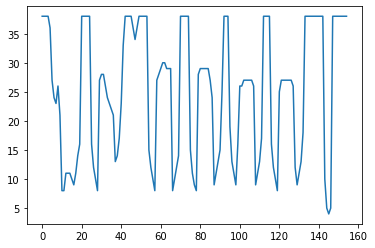

In [6]:
verticalCut(img_medi)